***(i) Import the function from the module "mzprojection"***

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mzprojection import mzprojection_ensemble_of_time_series

#help(mzprojection_ensemble_of_time_series)

***(ii) Prepare ensemble of time series data***  
Here, we split a long time-series data of statistically steady state into some number of short-time ensembles.

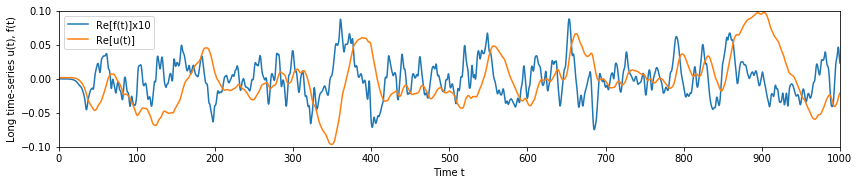

In [2]:
#= Read sample data =
indata = np.loadtxt('../sample_data/sample_time_series.dat')
time     = indata[:,0]                      # Time
u_raw    = indata[:,1] + 1.0j * indata[:,2] # Variable of interest u(t)
dudt_raw = indata[:,3] + 1.0j * indata[:,4] # = du/dt
f_raw    = indata[:,5] + 1.0j * indata[:,6] # Analyzed data f(t)

fig = plt.figure(figsize=(14,2.5))
ax = fig.add_subplot(111)
ax.set_xlim(0,1000)
ax.set_xticks(np.arange(0,1001,100))
ax.set_ylim(-0.1,0.1)
ax.set_xlabel("Time t")
ax.set_ylabel("Long time-series u(t), f(t)")
ax.plot(time,f_raw.real*10,label="Re[f(t)]x10")
ax.plot(time,u_raw.real,label="Re[u(t)]")
plt.legend()
plt.show()

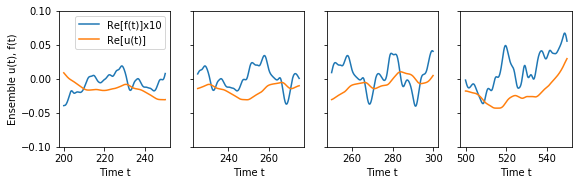

In [3]:
#= Parameters for ensemble average =
nrec    = len(time)         # Total record number                
ista    = 2000              # Start record number for sampling   
nperiod = 500               # Length of a sample                 
nshift  = 1                 # Length of time shift while sampling
delta_t = time[1] - time[0] # Time step size                     

nsample = int((nrec-ista-nperiod)/nshift) + 1
u    = np.zeros([nperiod,nsample], dtype=np.complex128)
dudt = np.zeros([nperiod,nsample], dtype=np.complex128)
f    = np.zeros([nperiod,nsample], dtype=np.complex128)
for iperiod in range(nperiod):
    u[   iperiod,:] =    u_raw[ista+iperiod:ista+iperiod+nshift*(nsample-1)+1:nshift]
    dudt[iperiod,:] = dudt_raw[ista+iperiod:ista+iperiod+nshift*(nsample-1)+1:nshift]
    f[   iperiod,:] =    f_raw[ista+iperiod:ista+iperiod+nshift*(nsample-1)+1:nshift]

fig = plt.figure(figsize=(14,2.5))
ax = fig.add_subplot(161)
ax.set_ylim(-0.1,0.1)
ax.set_xlabel("Time t")
ax.set_ylabel("Ensemble u(t), f(t)")
isample=0
ax.plot(time[ista+nshift*isample:ista+nshift*isample+nperiod],f[:,isample].real*10,label="Re[f(t)]x10")
ax.plot(time[ista+nshift*isample:ista+nshift*isample+nperiod],u[:,isample].real,label="Re[u(t)]")
plt.legend()

ax = fig.add_subplot(162)
ax.set_ylim(-0.1,0.1)
ax.set_yticklabels([])
ax.set_xlabel("Time t")
isample=250
ax.plot(time[ista+nshift*isample:ista+nshift*isample+nperiod],f[:,isample].real*10,label="Re[f(t)]x10")
ax.plot(time[ista+nshift*isample:ista+nshift*isample+nperiod],u[:,isample].real,label="Re[u(t)]")

ax = fig.add_subplot(163)
ax.set_ylim(-0.1,0.1)
ax.set_yticklabels([])
ax.set_xlabel("Time t")
isample=500
ax.plot(time[ista+nshift*isample:ista+nshift*isample+nperiod],f[:,isample].real*10,label="Re[f(t)]x10")
ax.plot(time[ista+nshift*isample:ista+nshift*isample+nperiod],u[:,isample].real,label="Re[u(t)]")

ax = fig.add_subplot(164)
ax.set_ylim(-0.1,0.1)
ax.set_yticklabels([])
ax.set_xlabel("Time t")
isample=3000
ax.plot(time[ista+nshift*isample:ista+nshift*isample+nperiod],f[:,isample].real*10,label="Re[f(t)]x10")
ax.plot(time[ista+nshift*isample:ista+nshift*isample+nperiod],u[:,isample].real,label="Re[u(t)]")

plt.show()

***(iii) Apply the Moti-Zwanzig projection operator method***  
The projection of $f(t)^i$ on $u(t)^i$ is calculated as,  
    $f(t)=\Omega u(t)+s(t)+r(t)$,  
    $s(t)=-\int_0^t \Gamma(t) u(t-v)dv$.  
The Markov coefficient $\Omega$, the memory function $\Gamma(t)$ and the uncorrelated term $r(t)$ are obtained as outputs.  
(Some correlations, e.g., $\langle r(t) u \rangle$ are also obtained to check the result.)

In [4]:
omega, memoryf, s, r, uu, ududt, fdudt, rr, rdudt, ru, fu, ff = \
    mzprojection_ensemble_of_time_series(nsample, nperiod, delta_t, u, dudt, f)

***(iv-a) Check results: plot $\Omega$ and $\Gamma(t)$***  

Markov coefficient Omega =  (-0.0003643927554043158+0.0025761538568977566j)


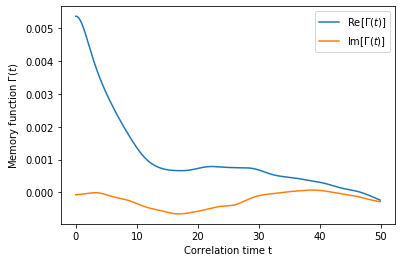

In [5]:
print("Markov coefficient Omega = ", omega)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("Correlation time t")
ax.set_ylabel("Memory function $\Gamma(t)$")
ax.plot(delta_t*np.arange(len(memoryf)),memoryf.real,label="Re[$\Gamma(t)$]")
ax.plot(delta_t*np.arange(len(memoryf)),memoryf.imag,label="Im[$\Gamma(t)$]")
plt.legend()
plt.show()

***(iv-b) Check results: plot time evolution of $f(t)=\Omega u(t)+s(t)+r(t)$***  

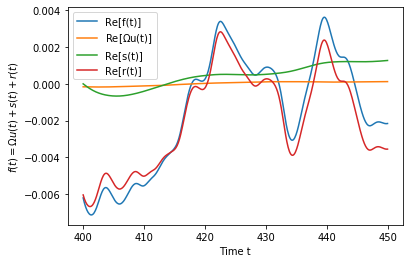

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("Time t")
ax.set_ylabel("$f(t)=\Omega u(t)+s(t)+r(t)$")
isample=2000
ax.plot(time[ista+nshift*isample:ista+nshift*isample+nperiod],f[:,isample].real,label="Re[f(t)]")
ax.plot(time[ista+nshift*isample:ista+nshift*isample+nperiod],(omega*u[:,isample]).real,label="Re[$\Omega$u(t)]")
ax.plot(time[ista+nshift*isample:ista+nshift*isample+nperiod],s[:,isample].real,label="Re[s(t)]")
ax.plot(time[ista+nshift*isample:ista+nshift*isample+nperiod],r[:,isample].real,label="Re[r(t)]")
plt.legend()
plt.show()

***(iv-c) Check results: Extended generalized fluctuation-dissipation theorem $\Gamma(t) = \langle r(t) du/dt \rangle / \langle u u \rangle$***  

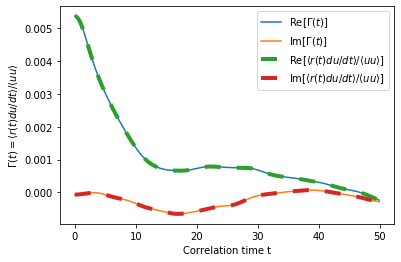

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("Correlation time t")
ax.set_ylabel(r"$\Gamma(t) = \langle r(t) du/dt \rangle / \langle u u \rangle$")
ax.plot(delta_t*np.arange(len(memoryf)),memoryf.real,label="Re[$\Gamma(t)$]")
ax.plot(delta_t*np.arange(len(memoryf)),memoryf.imag,label="Im[$\Gamma(t)$]")
ax.plot(delta_t*np.arange(len(memoryf)),(rdudt/uu[0]).real,label=r"Re[$\langle r(t) du/dt \rangle / \langle u u \rangle$]",dashes=[4,4],linewidth=4)
ax.plot(delta_t*np.arange(len(memoryf)),(rdudt/uu[0]).imag,label=r"Im[$\langle r(t) du/dt \rangle / \langle u u \rangle$]",dashes=[4,4],linewidth=4)
plt.legend()
plt.show()

***(iv-d) Check results: $\langle r(t) u \rangle = 0$***  
Namely, the uncorrelated term $r(t)$ indeed extracts the part of $f(t)$ uncorrelated with $u$. It is checked by $\langle r(t) u \rangle \ll \langle f(t) u \rangle$.

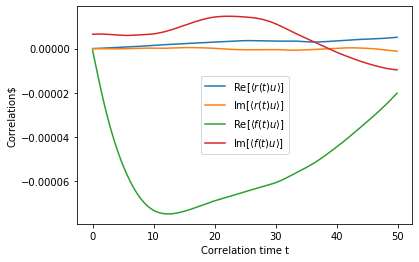

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("Correlation time t")
ax.set_ylabel("Correlation$")
ax.plot(delta_t*np.arange(len(ru)),ru.real,label=r"Re[$\langle r(t) u \rangle$]")
ax.plot(delta_t*np.arange(len(ru)),ru.imag,label=r"Im[$\langle r(t) u \rangle$]")
ax.plot(delta_t*np.arange(len(ru)),fu.real,label=r"Re[$\langle f(t) u \rangle$]")
ax.plot(delta_t*np.arange(len(ru)),fu.imag,label=r"Im[$\langle f(t) u \rangle$]")
plt.legend()
plt.show()